In [1]:
import requests
import json

overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area[name="Chennai"]->.searchArea;
    (node["amenity"](area.searchArea);
     way["amenity"](area.searchArea);
     relation["amenity"](area.searchArea);
    );
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

In [2]:
len(data['elements'])                                        #2608
# response
# import Geopandas as gpd 
# gpd.GeoDataFrame(data.elements)
# data

3801

In [141]:
# print(len(overpass_query.ways))
# print(len(overpass_query.relations))
# print(len(response.nodes))
data['elements'][0]

{'type': 'node',
 'id': 243060332,
 'lat': 13.0334336,
 'lon': 80.2679457,
 'tags': {'amenity': 'bus_station',
  'created_by': 'Potlatch 0.10f',
  'name': 'Mylapore Bus Terminus'}}

# Study Area - Chennai

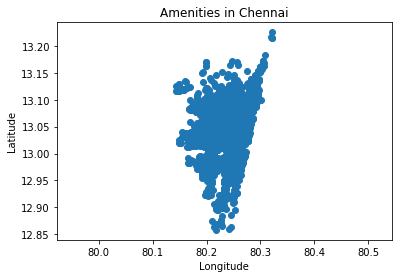

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Collect coords into list
coords = []
for element in data['elements']:
    if element['type'] == 'node':
        lon = element['lon']
        lat = element['lat']
        coords.append((lon, lat))
    elif 'center' in element:
        lon = element['center']['lon']
        lat = element['center']['lat']
        coords.append((lon, lat))

# Convert coordinates into numpy array
X = np.array(coords)

plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Amenities in Chennai')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

In [7]:
import geopandas as gpd

In [12]:
df = gpd.GeoDataFrame(data['elements'])
df.head()

,center,id,lat,lon,members,nodes,tags,type
0,NaN,243060332,13.033434,80.267946,NaN,NaN,"{'amenity': 'bus_station', 'created_by': 'Potl...",node
1,NaN,247437516,13.082048,80.275597,NaN,NaN,"{'amenity': 'bus_station', 'name': 'Central St...",node
2,NaN,247677936,13.022402,80.276327,NaN,NaN,"{'amenity': 'bus_station', 'created_by': 'Potl...",node
3,NaN,247691507,13.066426,80.284329,NaN,NaN,"{'amenity': 'bus_station', 'name': 'Anna Squar...",node
4,NaN,247691544,13.051211,80.277839,NaN,NaN,"{'amenity': 'bus_station', 'created_by': 'Potl...",node


Geopandas is an extension of Pandas used to work with geospatial data 

In [14]:
fdf = pd.concat([df, df['tags'].apply(pd.Series)], axis=1)
fdf.head()

,center,id,lat,lon,members,nodes,tags,type,amenity,created_by,...,lit,smoothness,amenity_1,toilets:disposal,historic,capacity:disabled,capacity:parent,capacity:women,height,type
0,NaN,243060332,13.033434,80.267946,NaN,NaN,"{'amenity': 'bus_station', 'created_by': 'Potl...",node,bus_station,Potlatch 0.10f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,247437516,13.082048,80.275597,NaN,NaN,"{'amenity': 'bus_station', 'name': 'Central St...",node,bus_station,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,247677936,13.022402,80.276327,NaN,NaN,"{'amenity': 'bus_station', 'created_by': 'Potl...",node,bus_station,Potlatch 0.7a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,247691507,13.066426,80.284329,NaN,NaN,"{'amenity': 'bus_station', 'name': 'Anna Squar...",node,bus_station,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,247691544,13.051211,80.277839,NaN,NaN,"{'amenity': 'bus_station', 'created_by': 'Potl...",node,bus_station,Potlatch 0.7a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
fdf.columns

Index(['center', 'id', 'lat', 'lon', 'members', 'nodes', 'tags', 'type',
       'amenity', 'created_by',
       ...
       'lit', 'smoothness', 'amenity_1', 'toilets:disposal', 'historic',
       'capacity:disabled', 'capacity:parent', 'capacity:women', 'height',
       'type'],
      dtype='object', length=191)

Additional Information about the tags of these coordinates such as category of the amenity , its type etc

In [16]:
import geopandas as gpd
import json
import fiona                                  # Library to create interactive maps 
from shapely.geometry import shape                  # library to create geometric data types like Point , Polygon , Linestring  


collection = list(fiona.open('export.geojson','r'))
df1 = pd.DataFrame(collection)

#Check Geometry
def isvalid(geom):
    try:
        shape(geom)
        return 1
    except:
        return 0
df1['isvalid'] = df1['geometry'].apply(lambda x: isvalid(x))
df1 = df1[df1['isvalid'] == 1]
collection = json.loads(df1.to_json(orient='records'))

#Convert to geodataframe
gdf = gpd.GeoDataFrame.from_features(collection)
gdf

,@geometry,@id,@tainted,access,addr,addr:city,addr:country,addr:district,addr:full,addr:housename,...,type,unisex,vehicle,waste,website,wheelchair,wheelchair:description,wifi,wikidata,wikipedia
0,center,relation/2062934,None,None,None,None,None,None,None,None,...,multipolygon,None,None,None,None,None,None,None,Q4705572,en:Alagappa College of Technology
1,center,relation/5401208,None,None,None,None,None,None,None,None,...,multipolygon,None,None,None,None,None,None,None,None,None
2,center,relation/5492630,None,None,None,None,None,None,None,None,...,multipolygon,None,None,None,None,None,None,None,None,None
3,center,relation/9578956,None,None,None,None,None,None,None,None,...,multipolygon,None,None,None,None,None,None,None,None,None
4,center,way/23186297,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,center,way/23186298,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,center,way/23186325,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,center,way/23186327,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,center,way/23186336,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,center,way/23813849,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,Q7607090,None


In [47]:
temp = df1['geometry'].apply(pd.Series)
temp = temp['coordinates'].apply(pd.Series)
temp.rename(columns={0:'Longitude',1:'Latitude'},inplace=True)


In [142]:
temp.head()

,Longitude,Latitude
1,80.238843,13.008152
2,80.226643,13.073484
3,80.276357,13.053945
4,80.204242,13.016775
5,80.231523,13.042298


In [24]:
from sklearn.preprocessing import StandardScaler

#Standardising the data for fitting
coords_scaled= temp
coords_scaled = StandardScaler().fit_transform(coords_scaled)
coords_scaled

array([[ 0.09204569, -0.63878751],
       [-0.29847125,  0.69702503],
       [ 1.29280406,  0.29751787],
       ...,
       [ 0.84639107,  0.75423594],
       [-0.08174323, -1.76168005],
       [ 0.58235803, -1.76256333]])

In [27]:
from sklearn.cluster import DBSCAN, KMeans 


cluster_errors = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i).fit(coords_scaled)
    centroids = kmeans.cluster_centers_
    cluster_errors.append(kmeans.inertia_)
 

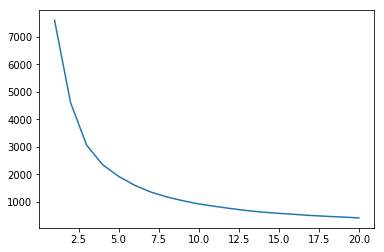

In [28]:
plt.plot(range(1,21),cluster_errors);

In [30]:
# Choosing K = 8 

kmclustering = KMeans(n_clusters=8).fit(coords_scaled)
centroids = kmclustering.cluster_centers_

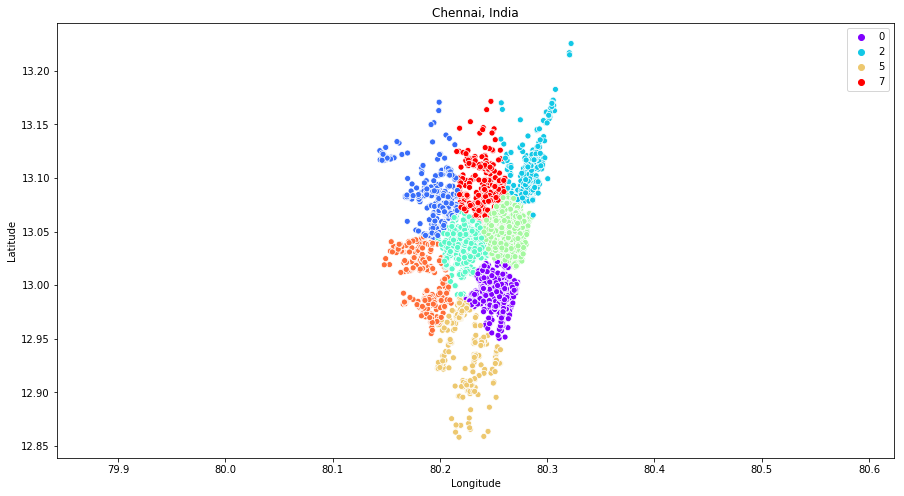

In [31]:
plt.figure(figsize=(15, 8))
sns.scatterplot(temp.iloc[:,0],temp.iloc[:,1], hue=kmclustering.labels_,palette='rainbow')
plt.title('Chennai, India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

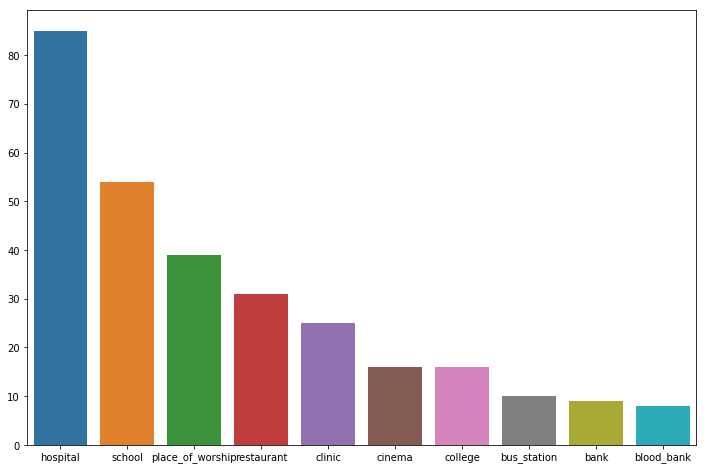

In [108]:
gdf[gdf['km_clusters']==4]['amenity'].value_counts()[:10]

import seaborn as sns 
plt.figure(figsize =  (12,8))
sns.barplot(x =gdf[gdf['km_clusters']==7]['amenity'].value_counts().index[:10], y= gdf[gdf['km_clusters']==7]['amenity'].value_counts().values[:10],data = gdf)

It seems that the clusters have a good mix of commercial elements like restaurents, ATM , banks , hospital , fuel , cafes etc 

Pace of worship is dominant in all clusters indicating the cultural setting of the city and its role in settlement of the population 

K-means is not the ideal data for Coordinates data because it minimizes variances and not the Geodetic distance 

There is considerable amount of distortion with the latitudes that are far away from the equator 

Instead, let’s use an algorithm that works better with arbitrary distances: scikit-learn’s implementation of the DBSCAN algorithm. DBSCAN clusters a spatial data set based on two parameters: a physical distance from each point, and a minimum cluster size. This method works much better for spatial latitude-longitude data.


# DBSCAN

In [120]:
from sklearn.cluster import DBSCAN, KMeans 

dbclustering = DBSCAN(eps=0.05, min_samples=2).fit(coords_scaled)


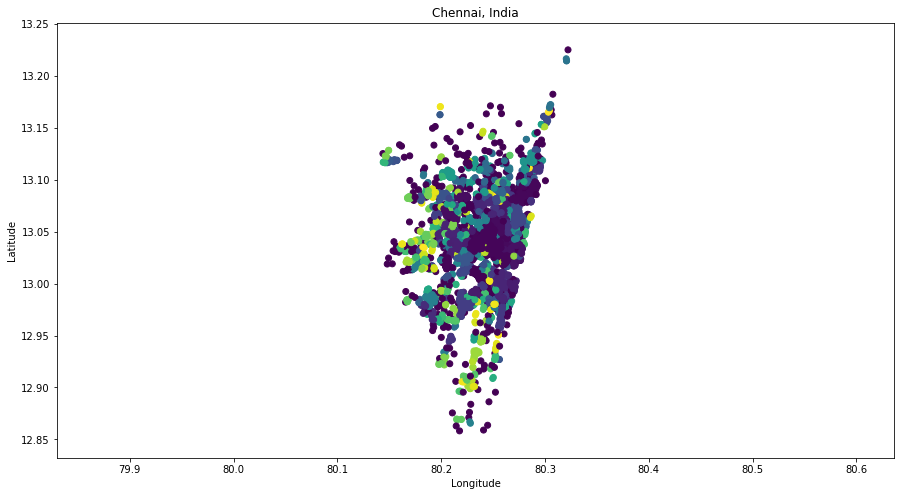

In [121]:

plt.figure(figsize=(15, 8))
plt.scatter(temp.iloc[:,0], temp.iloc[:,1], c=dbclustering.labels_.astype(float))
plt.title('Chennai, India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

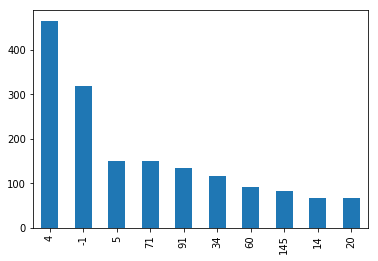

In [72]:
# gdf['clusters'] = dbclustering.labels_
gdf['clusters'].value_counts()[:10].plot(kind='bar')                    # Top 10 clusters 

C:\Users\Shyam Sundar\Anaconda3\lib\site-packages\geopandas\plotting.py:466: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


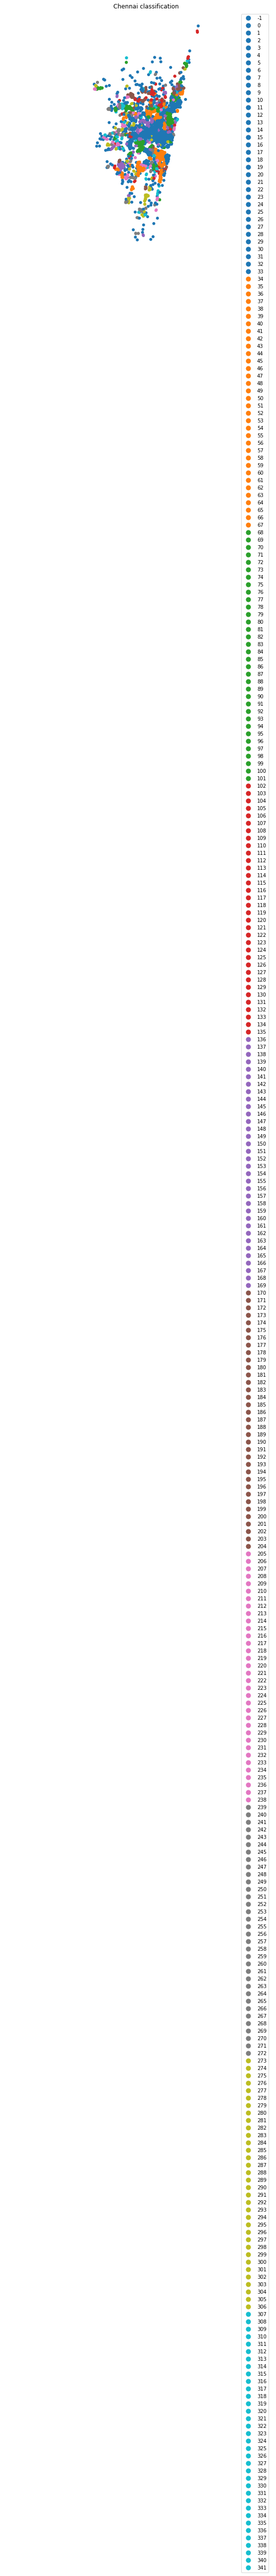

In [73]:
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including a legend and with no boundary lines
gdf.plot(column='clusters', categorical=True, legend=True, linewidth=0, axes=ax)
# Remove axis
ax.set_axis_off()
# Keep axes proportionate
plt.axis('equal')
# Add title
plt.title('Chennai classification')
# Display the map
plt.show()

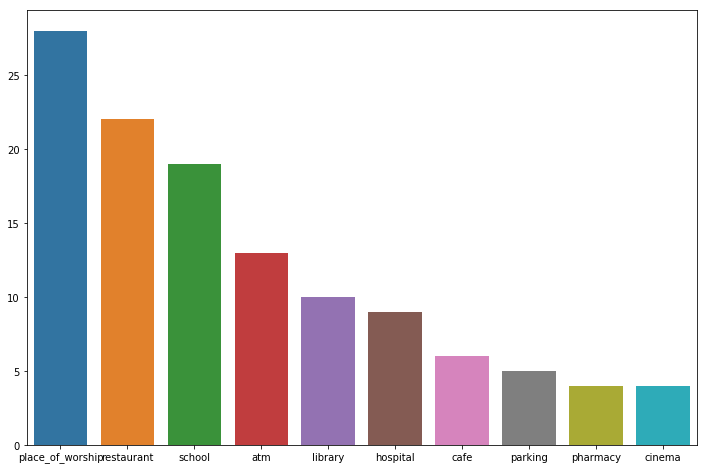

In [125]:
plt.figure(figsize =  (12,8))

sns.barplot(x =gdf[gdf['clusters']==71]['amenity'].value_counts().index[:10], y= gdf[gdf['clusters']==71]['amenity'].value_counts().values[:10],data = gdf)

In [137]:
gdf[gdf['clusters']==71]['name']

197                                   Christchurch School
265                                                  None
290                                                  None
291                                                  None
292                                                  None
295                                                  None
296                                                  None
297                                                  None
298                                                  None
299                                                  None
349                                                  None
502                            Kasturibai Gandhi Hospital
504                                          Perumal Koil
505                                 Queenship Mary Church
506                                 Shanti Gurudev Temple
522                                                  None
523                                                  None
524           

In [83]:
import folium
from folium import plugins
from folium.plugins import MarkerCluster


boulder_coords = [13.0521, 80.2255]

#Create the map
km_map = folium.Map(location = boulder_coords, zoom_start = 13)

#Display the map
km_map

In [ ]:
for i in range(len(coords)):
    folium.Marker(coords.tolist()[i], popup = 'CU Boulder').add_to(km_map)

km_map

In [87]:
gdf['km_clusters'] = kmclustering.labels_

In [38]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
coords = temp.as_matrix()
coords

C:\Users\Shyam Sundar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


array([[80.2388431, 13.0081519],
       [80.2266426, 13.0734845],
       [80.2763571, 13.0539452],
       ...,
       [80.2624103, 13.0762826],
       [80.2334136, 12.9532329],
       [80.2541614, 12.9531897]])

In [50]:
coords = np.flip(coords)

In [51]:
kms_per_radian = 6371.0088
epsilon = 1.5 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 8


In [52]:
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)
centermost_points = clusters.map(get_centermost_point)

In [53]:
lats, lons = zip(*centermost_points)
rep_points = pd.DataFrame({'lon':lons, 'lat':lats})

In [61]:
rs = rep_points.apply(lambda row: temp[(temp['Latitude']==row['lat']) & (temp['Longitude']==row['lon'])].iloc[0], axis=1)

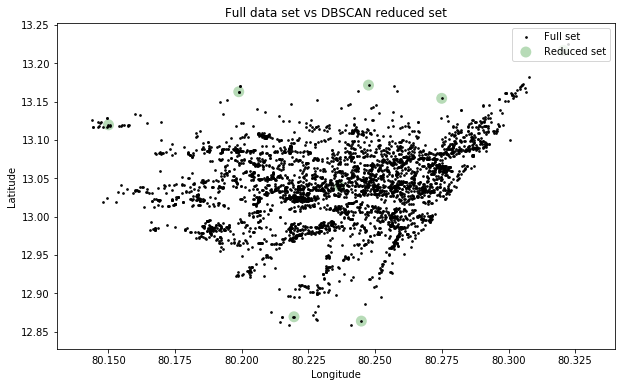

In [65]:
fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(rs['Longitude'], rs['Latitude'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
df_scatter = ax.scatter(temp['Longitude'], temp['Latitude'], c='k', alpha=0.9, s=3)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()